# Support Vector Machine
A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is a powerful and versatile method that can handle both linear and non-linear data.

The main idea behind SVM is to find a hyperplane in a high-dimensional feature space that separates different classes as much as possible. In the case of linearly separable data, the hyperplane is the line that maximizes the margin between the classes. This hyperplane is referred to as the "maximum-margin hyperplane."

SVMs can also handle non-linear data by mapping the input features into a higher-dimensional space through a technique called the "kernel trick." The kernel trick allows SVMs to implicitly compute the dot product of the transformed features without actually performing the transformation explicitly. This way, SVMs can effectively classify data that is not linearly separable in the original feature space.

To train an SVM, you need a labeled dataset where each data point is associated with a class label. The algorithm learns the parameters that define the hyperplane by optimizing an objective function that maximizes the margin between classes while minimizing the classification error.

Once trained, the SVM can be used for classification tasks by evaluating the position of a new data point in relation to the hyperplane. The point's position determines the predicted class label.

**SVMs have several advantages, including:**

Effective in high-dimensional spaces: SVMs work well even in cases where the number of features is larger than the number of samples.

Robust against overfitting: By maximizing the margin, SVMs tend to have good generalization properties and can avoid overfitting.

Versatility through kernel functions: SVMs can handle non-linear data by using different kernel functions, such as polynomial, radial basis function (RBF), or sigmoid.

However, SVMs also have some limitations:

Computationally intensive: Training an SVM can be time-consuming, especially with large datasets. Additionally, the memory required scales with the number of training samples.

Sensitivity to parameter tuning: SVMs have parameters that need to be carefully selected, such as the choice of the kernel function and the regularization parameter. Poor parameter selection can lead to suboptimal performance.

Overall, SVMs are powerful machine learning algorithms that can handle both linear and non-linear classification tasks. With appropriate parameter tuning and careful preprocessing of the data, SVMs can achieve excellent performance on a wide range of problems.








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
# Load the Iris dataset from scikit-learn
from sklearn.datasets import load_iris

# Load the dataset
iris_data = load_iris()

# Create a DataFrame from the iris dataset
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target variable to the DataFrame
iris_df['target'] = iris_data.target

# Print the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df.shape

(150, 5)

## SVM Classification

SVM (Support Vector Machine) is a powerful algorithm commonly used for classification tasks. It finds the optimal hyperplane that separates different classes by maximizing the margin between them. 

We can customize the SVM classification model by specifying different kernel functions (linear, poly, rbf, etc.) and tuning hyperparameters such as C, gamma, and the kernel-specific parameters. Additionally, we can explore techniques like cross-validation and grid search to find the optimal hyperparameters for your specific classification problem.

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [5]:
X = iris_df.drop('target', axis =1)
y = iris_df[['target']]

In [6]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel='linear', C=1))
])

In [7]:
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=1, kernel='linear'))])

In [8]:
svm_clf.predict(X.iloc[[55]])

array([1])

In [9]:
svm_clf.predict(X.iloc[[0]])

array([0])

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

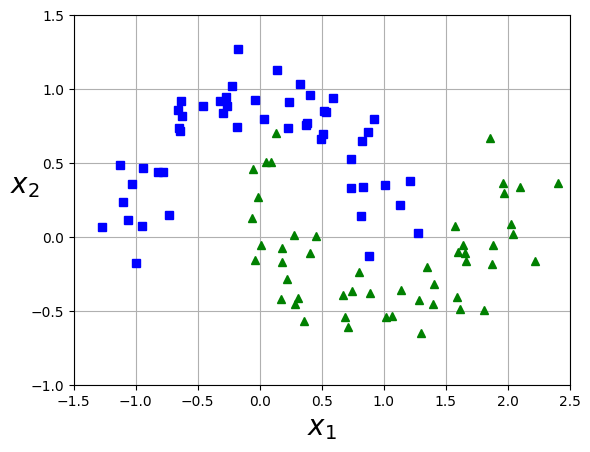

In [11]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [12]:
from sklearn.svm import LinearSVC

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [13]:
X.shape

(100, 2)

In [14]:
prediction = polynomial_svm_clf.predict(X[[0]])
print(prediction)

[1]


In [15]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

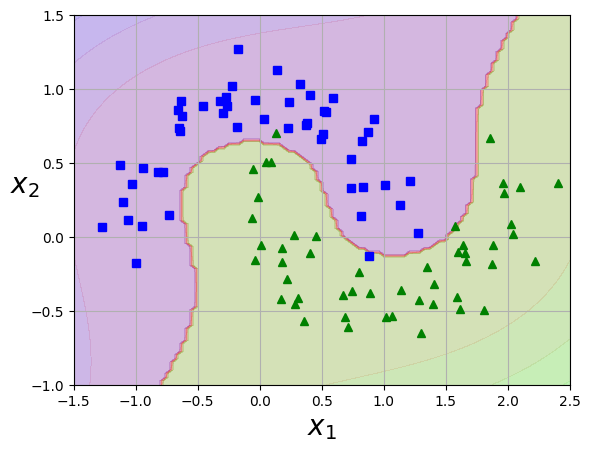

In [16]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#plt.savefig("moons_polynomial_svc_plot", format='png', dpi=300)
#plt.show()

In [17]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [18]:
prediction = poly_kernel_svm_clf.predict(X[[3]])
print(prediction)

[0]


In [19]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

In [20]:
prediction = poly100_kernel_svm_clf.predict(X[[3]])
print(prediction)

[0]


Text(0.5, 1.0, '$d=10, r=100, C=5$')

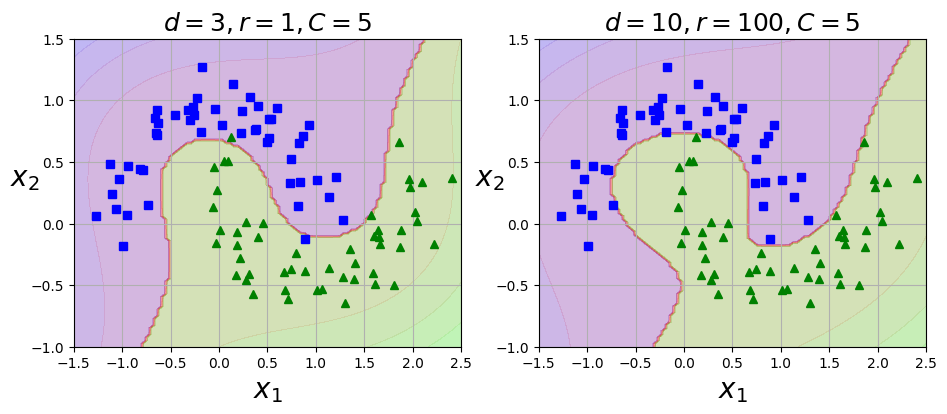

In [21]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

## Gaussian RBF Kernel

In [22]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

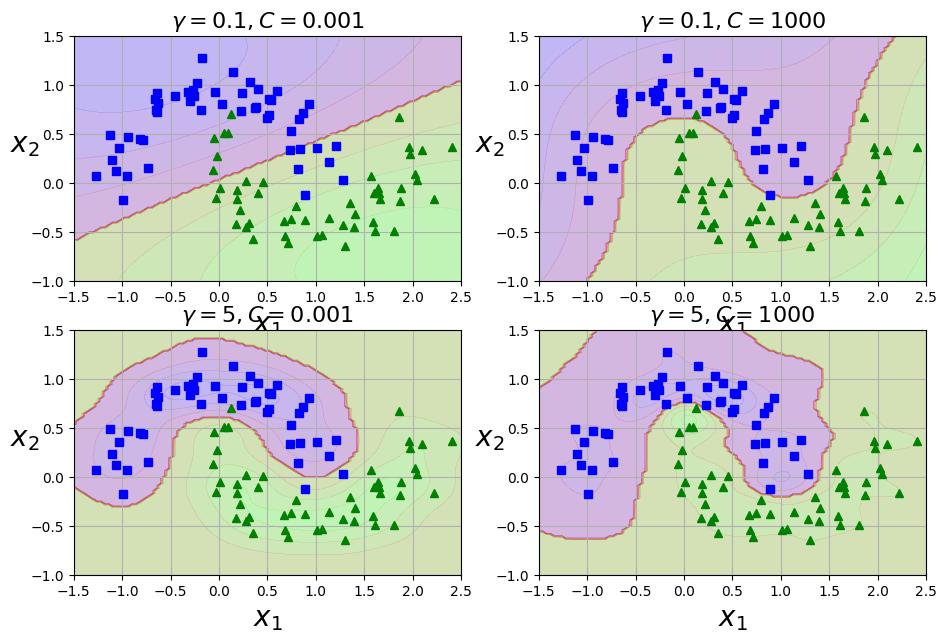

In [23]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

## SVM Regression
SVM (Support Vector Machine) can also be used for regression tasks. SVM regression aims to find a function that approximates the relationship between the input features and the target variable. **The goal is to find a hyperplane that has a maximum margin while minimizing the number of instances falling outside the margin.**

We can customize the SVM regression model by specifying different kernel functions (linear, poly, rbf, etc.) and tuning hyperparameters such as C, epsilon, and the kernel-specific parameters.

In [24]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

#Initializing random numbers

In [25]:
X.shape

(50, 1)

In [26]:
from sklearn.svm import LinearSVR # Importing the SVM Regression class

svm_reg = LinearSVR(epsilon=1.5, random_state=42) #Here, epsilon is the margin of tolerance for errors
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [27]:
svm_reg.epsilon

1.5

In [28]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
eps_y_pred

array([6.52640746])

Text(0.5, 1.0, '$\\epsilon = 0.5$')

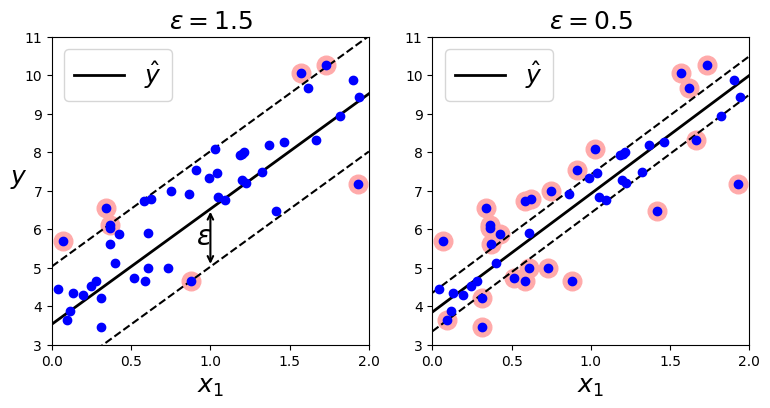

In [29]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

In [30]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [31]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [32]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, gamma='auto', kernel='poly')

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

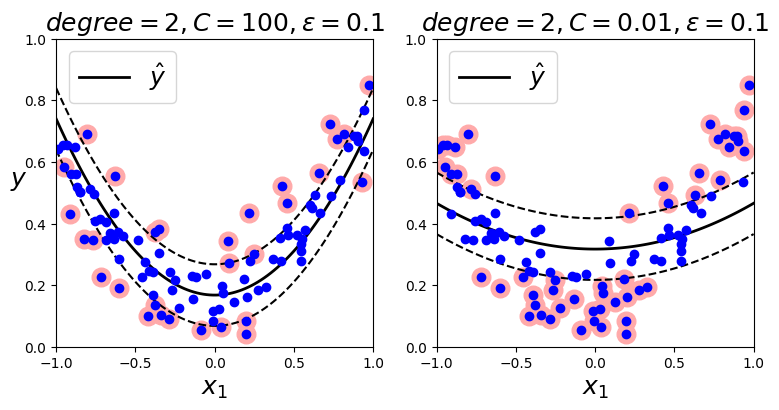

In [33]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
